<a href="https://colab.research.google.com/github/flemmingha/AspNetDocs/blob/master/FRED_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load of data from FRED

Install Fred api for data fetch

In [1]:
pip install fredapi

Import data from Fred

In [2]:
from fredapi import Fred
fred = Fred(api_key='04f80a559ab98cb76e6e60c7f421dd51')
datasetT102Y = fred.get_series('T10Y2Y')
print(datasetT102Y)

1976-06-01    0.68
1976-06-02    0.71
1976-06-03    0.70
1976-06-04    0.77
1976-06-07    0.79
1976-06-08    0.79
1976-06-09    0.82
1976-06-10    0.86
1976-06-11    0.83
1976-06-14    0.83
1976-06-15    0.83
1976-06-16    0.81
1976-06-17    0.79
1976-06-18    0.82
1976-06-21    0.85
1976-06-22    0.80
1976-06-23    0.80
1976-06-24    0.82
1976-06-25    0.81
1976-06-28    0.84
1976-06-29    0.84
1976-06-30    0.84
1976-07-01    0.86
1976-07-02    0.85
1976-07-05     NaN
1976-07-06    0.86
1976-07-07    0.85
1976-07-08    0.90
1976-07-09    1.01
1976-07-12    1.04
              ... 
2019-08-29   -0.03
2019-08-30    0.00
2019-09-02     NaN
2019-09-03    0.00
2019-09-04    0.04
2019-09-05    0.02
2019-09-06    0.02
2019-09-09    0.05
2019-09-10    0.05
2019-09-11    0.07
2019-09-12    0.07
2019-09-13    0.11
2019-09-16    0.10
2019-09-17    0.09
2019-09-18    0.03
2019-09-19    0.05
2019-09-20    0.05
2019-09-23    0.04
2019-09-24    0.04
2019-09-25    0.05
2019-09-26    0.04
2019-09-27  

Insert data into Pandas DataFrame

In [3]:
import pandas as pd

#df=pd.DataFrame(data=datasetT102Y, columns=['Value']) #, parse_dates=['date'], index_col='date'

df=pd.DataFrame(data=datasetT102Y, index=None, columns=['value']) 

df.index.name = 'dates'

df.head()

#print(df)

,value
dates,
1976-06-01,0.68
1976-06-02,0.71
1976-06-03,0.70
1976-06-04,0.77
1976-06-07,0.79


In [0]:
#df['row'] = df.reset_index().index
#df

# Data Cleansing

Forward fill of missing values

descriptive measures of the data

In [5]:
list(df.columns) 

['value']

In [6]:
df['value'].count()

10837

In [7]:
len(df.index)

11312

In [8]:
df.shape

(11312, 1)

In [0]:
#df.dropna()

In [10]:
#df['Value'].value_counts()
#df.groupby('Value').count()
df.isna().sum()  

value    475
dtype: int64

NaN values are replaced using forward fill meaning missing values are replaced with the ones just before

In [0]:
df_filled = df.fillna(method='ffill')

In [12]:
df_filled.shape

(11312, 1)

In [13]:
df_filled['value'].count()

11312

In [14]:
len(df_filled.index)

11312

In [15]:
df_filled.isna().sum() 

value    0
dtype: int64

# Plot data graphically

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


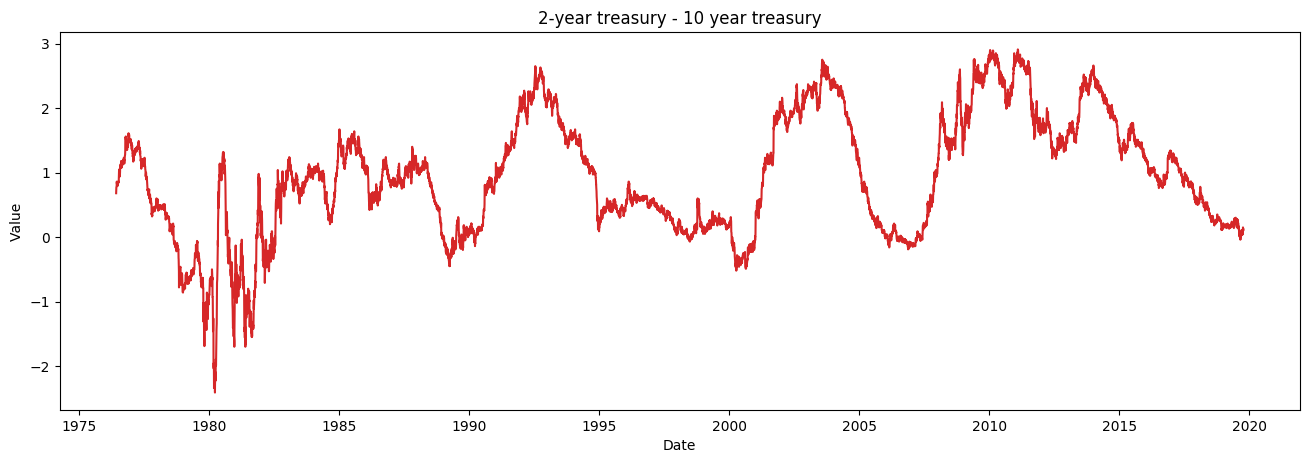

In [16]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df_filled, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_filled, x=df_filled.index, y=df_filled.value, title='2-year treasury - 10 year treasury')    

# Analysis for seasonality

Trend, Seasonality, Residual

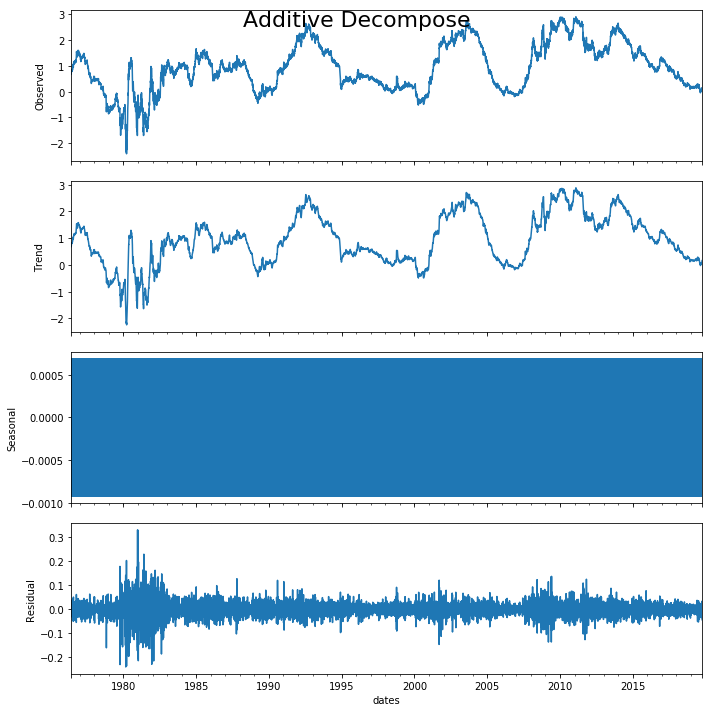

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
#result_mul = seasonal_decompose(df_filled['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_filled['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [18]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head(20)

,seas,trend,resid,actual_values
dates,,,,
1976-06-01,-0.000920,0.684,-0.003080,0.68
1976-06-02,0.000554,0.707,0.002446,0.71
1976-06-03,0.000686,0.730,-0.030686,0.70
1976-06-04,0.000369,0.752,0.017631,0.77
1976-06-07,-0.000689,0.774,0.016689,0.79
1976-06-08,-0.000920,0.806,-0.015080,0.79
1976-06-09,0.000554,0.818,0.001446,0.82
1976-06-10,0.000686,0.826,0.033314,0.86
1976-06-11,0.000369,0.834,-0.004369,0.83


# Stationarity

Next step

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. If the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

Here it is stationary as p-value is below 0.05

The KPSS test, where the null hypothesis is that the data is stationary is rejected which means that the two tests do not agree.

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df_filled.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_filled.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.991579925622189
p-value: 0.03568824645233067
Critial Values:
   1%, -3.4309300629011337
Critial Values:
   5%, -2.861796356491901
Critial Values:
   10%, -2.5669064534509722

KPSS Statistic: 4.967198
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# Detrending

Text(0.5, 1.0, '10Y2Y detrended')

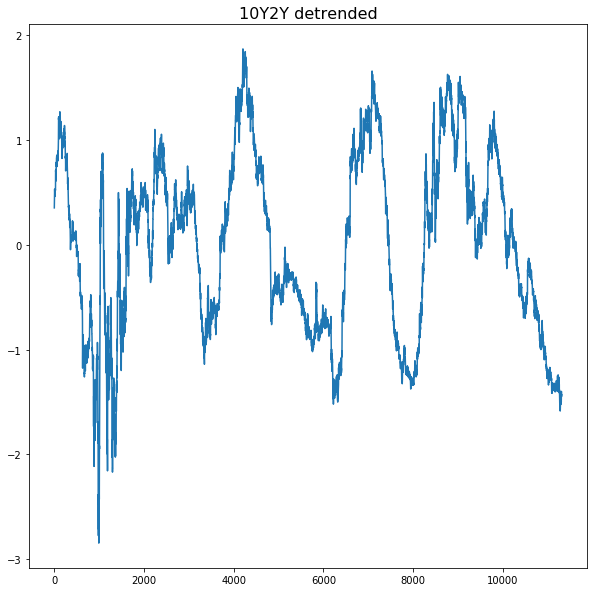

In [20]:
# Using scipy: Subtract the line of best fit
from scipy import signal
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df_filled.value.values)
plt.plot(detrended)
plt.title('10Y2Y detrended', fontsize=16)

# Deseasonalization

[]

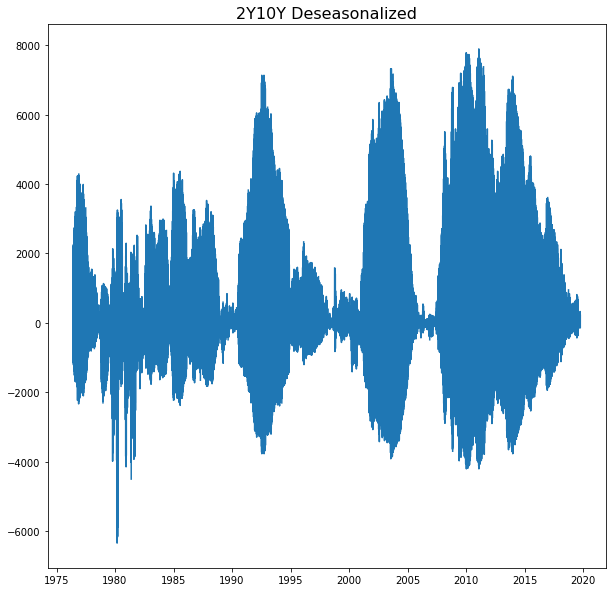

In [21]:
# Subtracting the Trend Component.
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
#result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('2Y10Y Deseasonalized', fontsize=16)
plt.plot()

# Test for seasonality

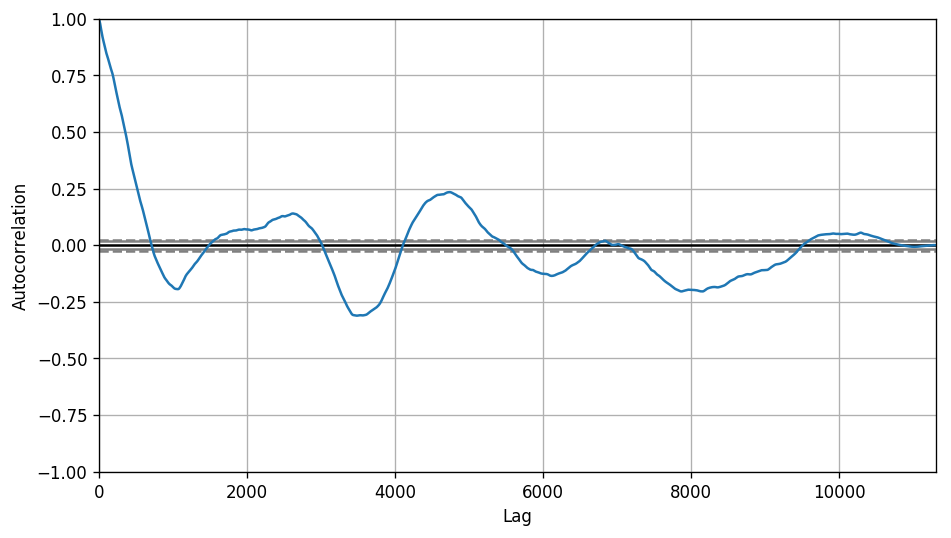

In [22]:
from pandas.plotting import autocorrelation_plot
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_filled.value.tolist())

# Autocorrelation

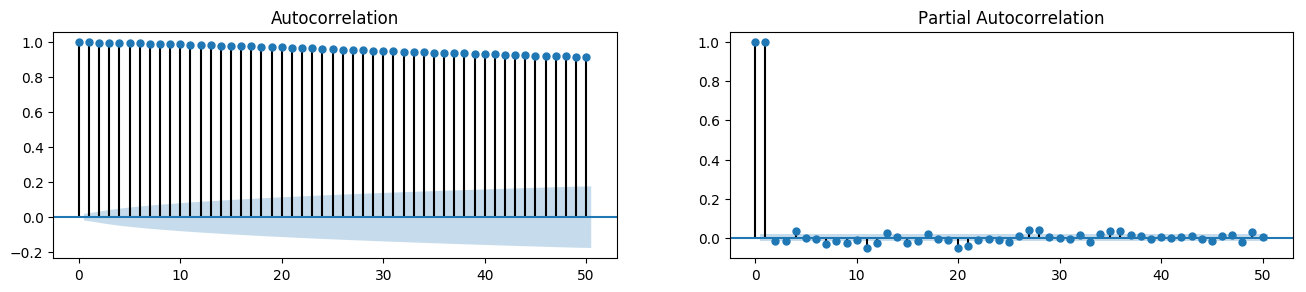

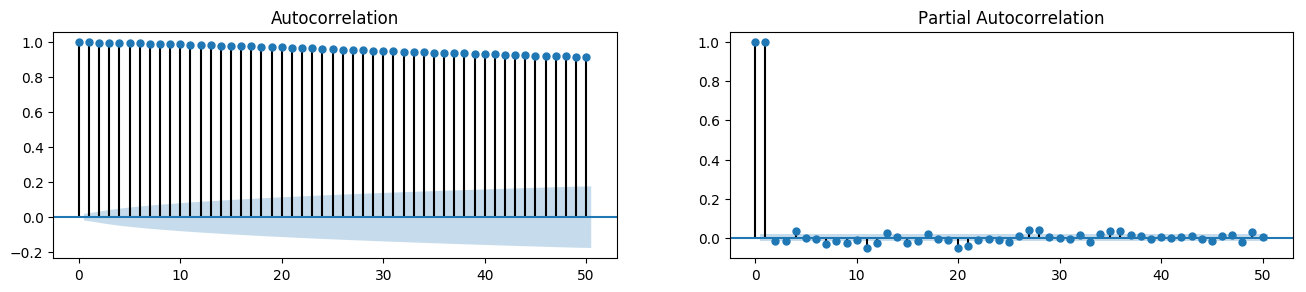

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_filled.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df_filled.value.tolist(), lags=50, ax=axes[1])

# Lag Plots

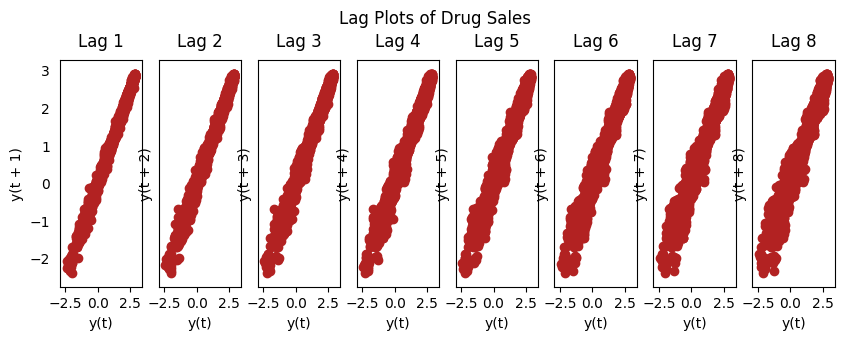

In [24]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(df_filled.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

# Approximate and sample entropy

In [25]:
import numpy as np

# https://en.wikipedia.org/wiki/Approximate_entropy
#ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
#a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

#print(ApEn(df_filled.value, m=2, r=0.2*np.std(df_filled.value)))     # 0.651
#print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.23772194107711542
0.6923143165721228


In [26]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

#print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
#print(SampEn(df_filled.value, m=2, r=0.2*np.std(df_filled.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

1.5040773967762742
2.515678308454754


# Smoothening

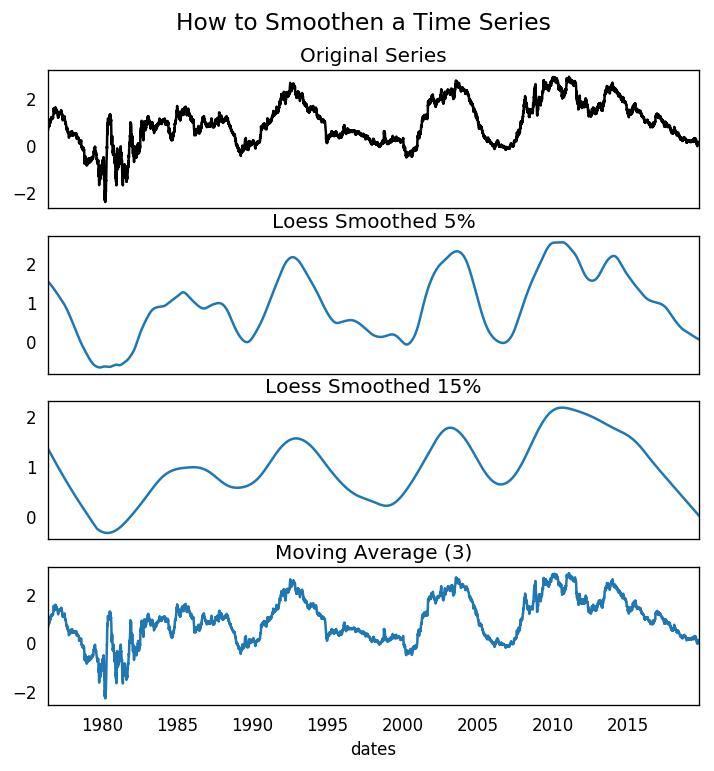

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
#df_orig = pd.read_csv('datasets/elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_filled.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_filled.value, np.arange(len(df_filled.value)), frac=0.05)[:, 1], index=df_filled.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_filled.value, np.arange(len(df_filled.value)), frac=0.15)[:, 1], index=df_filled.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_filled['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

# Granger Causality

H0 = Month cannot be used to forecast 2Y10Y

p-values are above 0.05 so month cannot be used to forecast 2Y10Y

In [28]:
from statsmodels.tsa.stattools import grangercausalitytests
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

df_filled['date'] = df_filled.index

df_filled['month'] = df_filled.date.dt.month

df_filled['year'] = df_filled.date.dt.year

grangercausalitytests(df_filled[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0144  , p=0.9045  , df_denom=11308, df_num=1
ssr based chi2 test:   chi2=0.0144  , p=0.9044  , df=1
likelihood ratio test: chi2=0.0144  , p=0.9044  , df=1
parameter F test:         F=0.0144  , p=0.9045  , df_denom=11308, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2565  , p=0.7737  , df_denom=11305, df_num=2
ssr based chi2 test:   chi2=0.5133  , p=0.7736  , df=2
likelihood ratio test: chi2=0.5133  , p=0.7737  , df=2
parameter F test:         F=0.2565  , p=0.7737  , df_denom=11305, df_num=2


{1: ({'lrtest': (0.01441058618365787, 0.9044482129885355, 1),
   'params_ftest': (0.014406773254093765, 0.9044629266991385, 11308.0, 1.0),
   'ssr_chi2test': (0.014410595357409284, 0.9044481827203128, 1),
   'ssr_ftest': (0.014406773256262417, 0.904462926690853, 11308.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.5132698951638304, 0.773650585239013, 2),
   'params_ftest': (0.25652731351186037, 0.7737383646545656, 11305.0, 2.0),
   'ssr_chi2test': (0.5132815419493644, 0.7736460799809086, 2),
   'ssr_ftest': (0.25652731351624947, 0.7737383646511663, 11305.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# ARIMA

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b


In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [30]:
y = df_filled['value'].resample('MS').mean()

y.head()

dates
1976-06-01    0.801364
1976-07-01    0.975909
1976-08-01    1.137273
1976-09-01    1.175909
1976-10-01    1.430952
Freq: MS, Name: value, dtype: float64

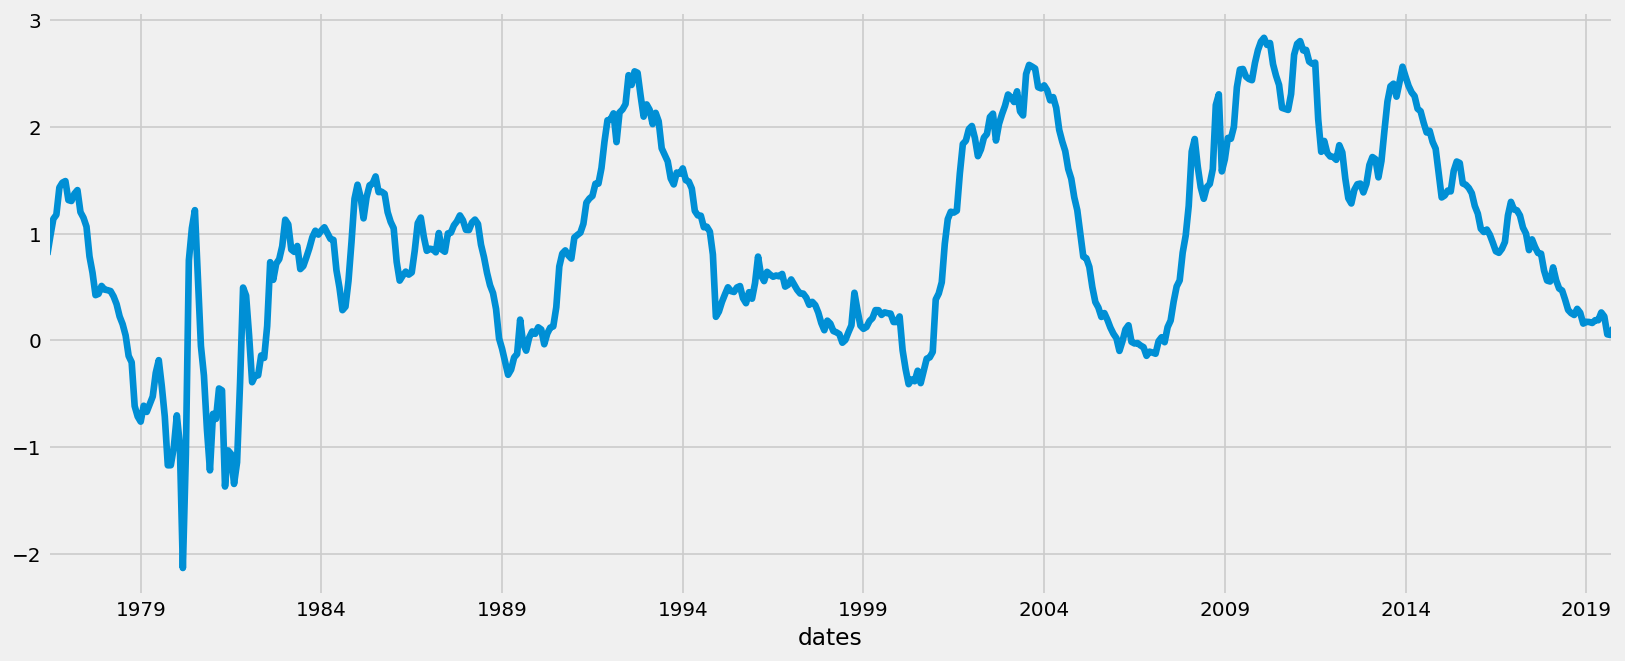

In [31]:
y.plot(figsize=(15, 6))
plt.show()

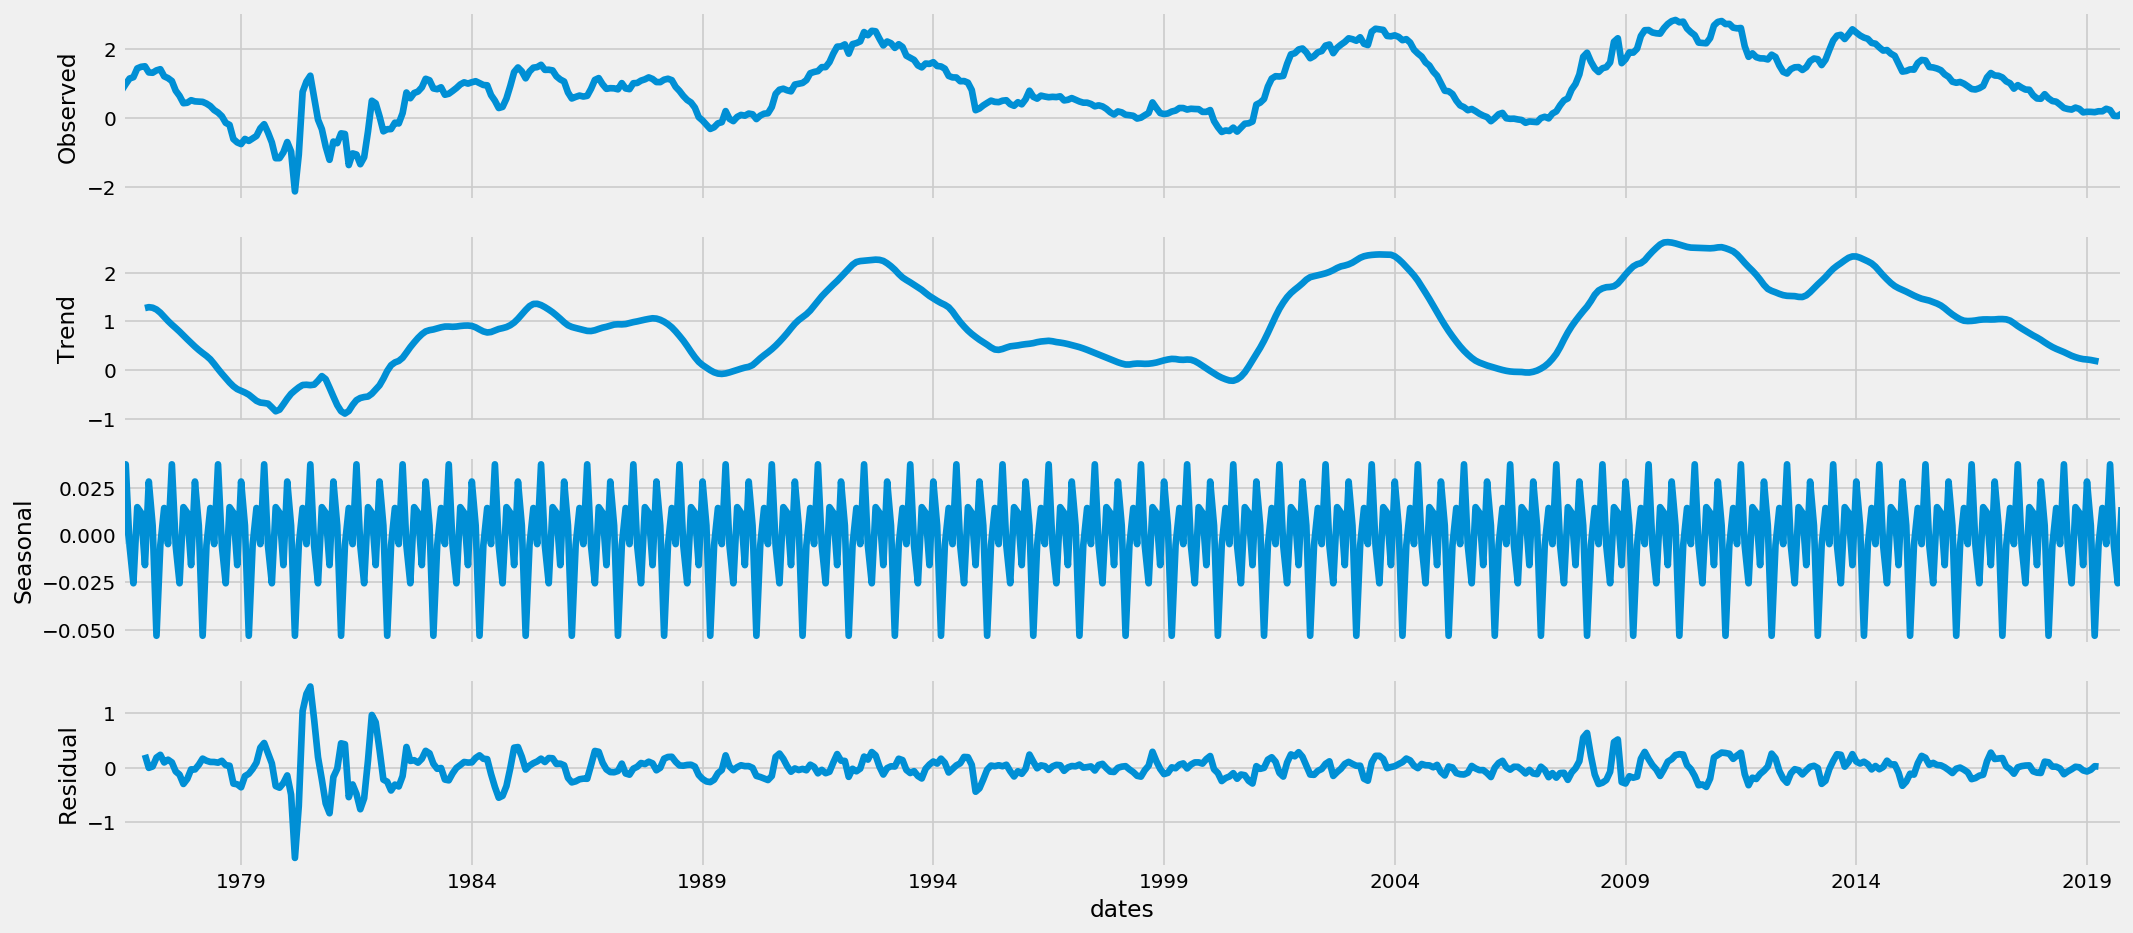

In [32]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

decomposition

Calculation of SARIMAX models with different parameters

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Lowest AIC shows the best ARIMA model

In [34]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1759.5376276615393
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1357.9176985333595
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1182.9596630629912
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1151.9175405746316
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1135.0929007235582
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1121.1779778987477
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1155.1607094203275
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1119.8971532749329
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1084.6936288456834
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:731.0129192872903
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:575.4599575604229
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:559.6965753604604
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:527.8992849665492
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:521.2347317401969
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:565.5267704323522
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:516.797378553722
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-188.56166960190237
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-178.5479802657125

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-270.3057404785887 is selected as it is the lowest ABS number.

Next step is to fit the model:

In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3583      0.039     -9.163      0.000      -0.435      -0.282
ma.L1          0.7573      0.038     20.133      0.000       0.684       0.831
sigma2         0.0343      0.001     35.995      0.000       0.032       0.036


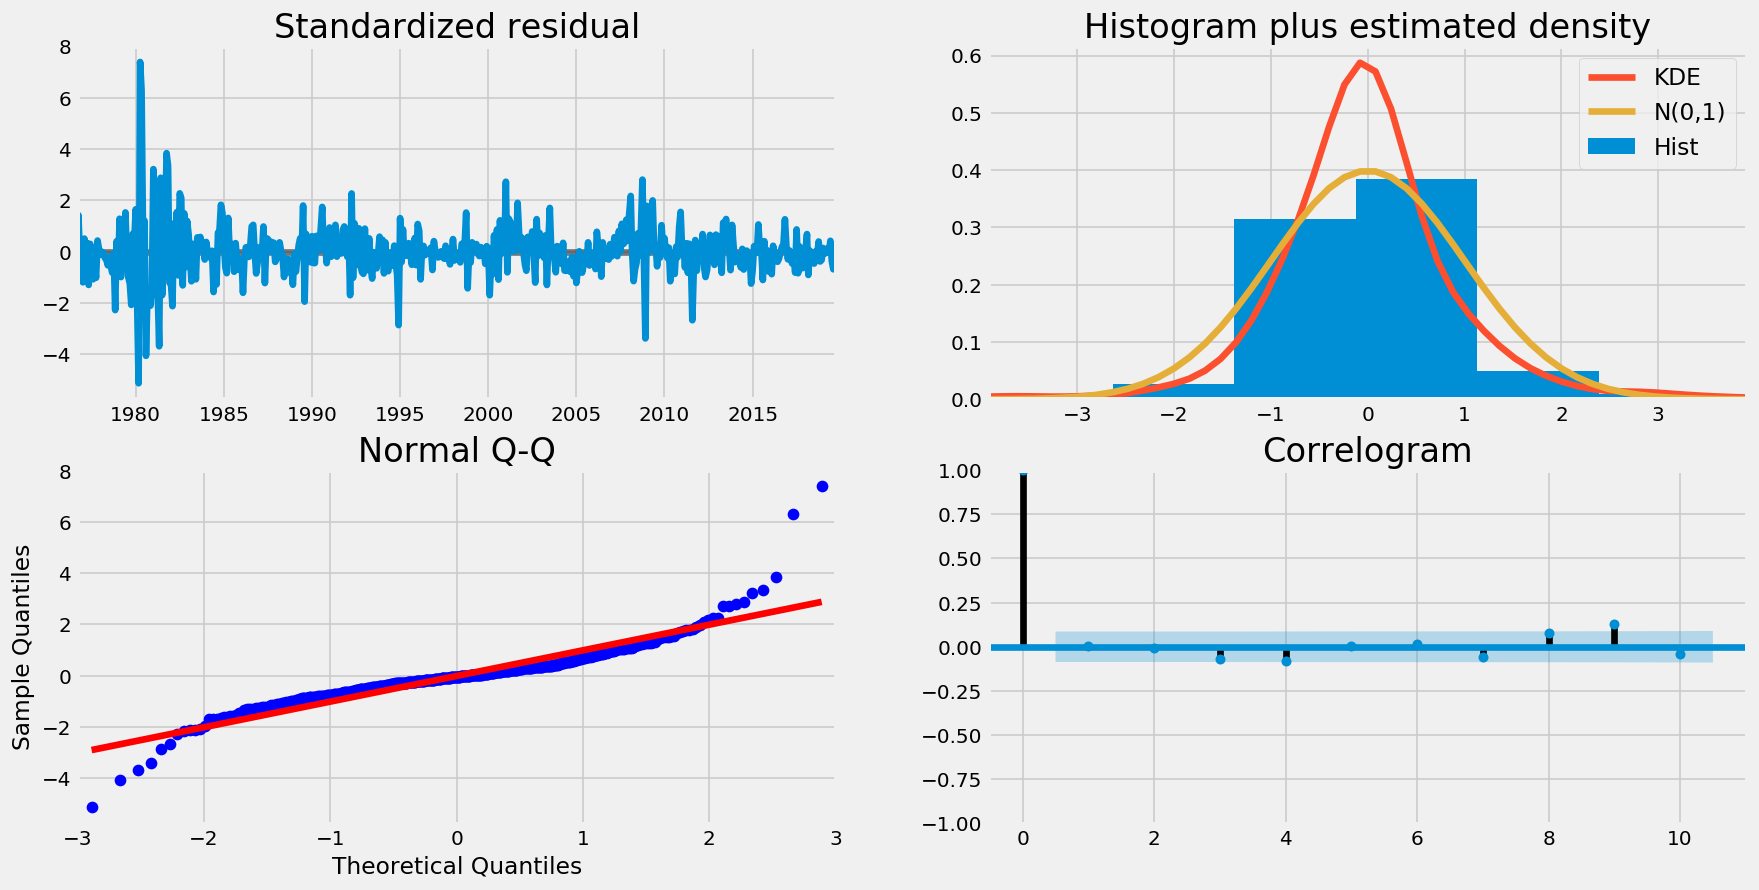

In [36]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

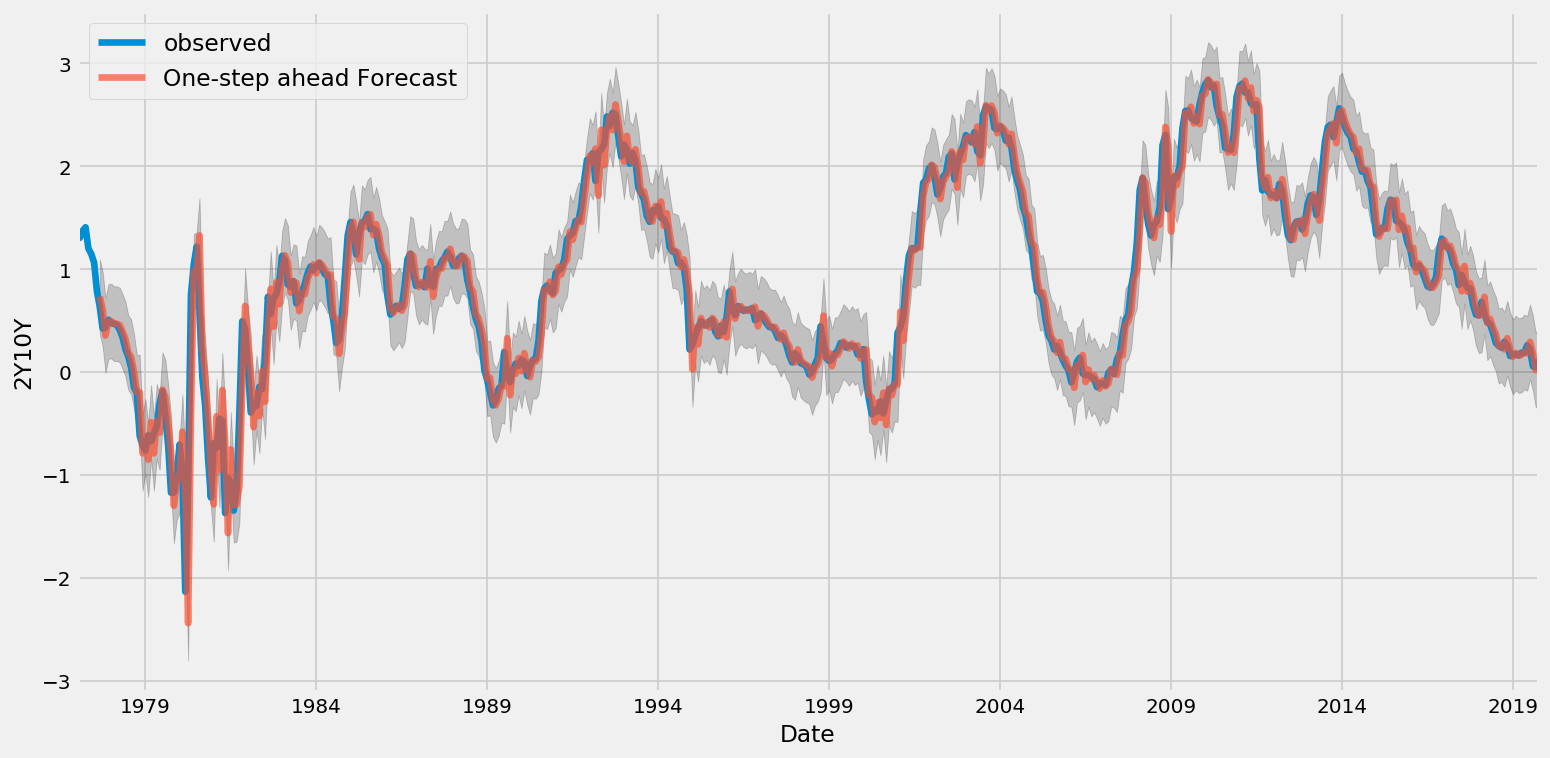

In [37]:
pred = results.get_prediction(start=pd.to_datetime('1977-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1977':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('2Y10Y')
plt.legend()
plt.show()

In [38]:
y_forecasted = pred.predicted_mean
y_truth = y['1977-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.03


In [39]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.19


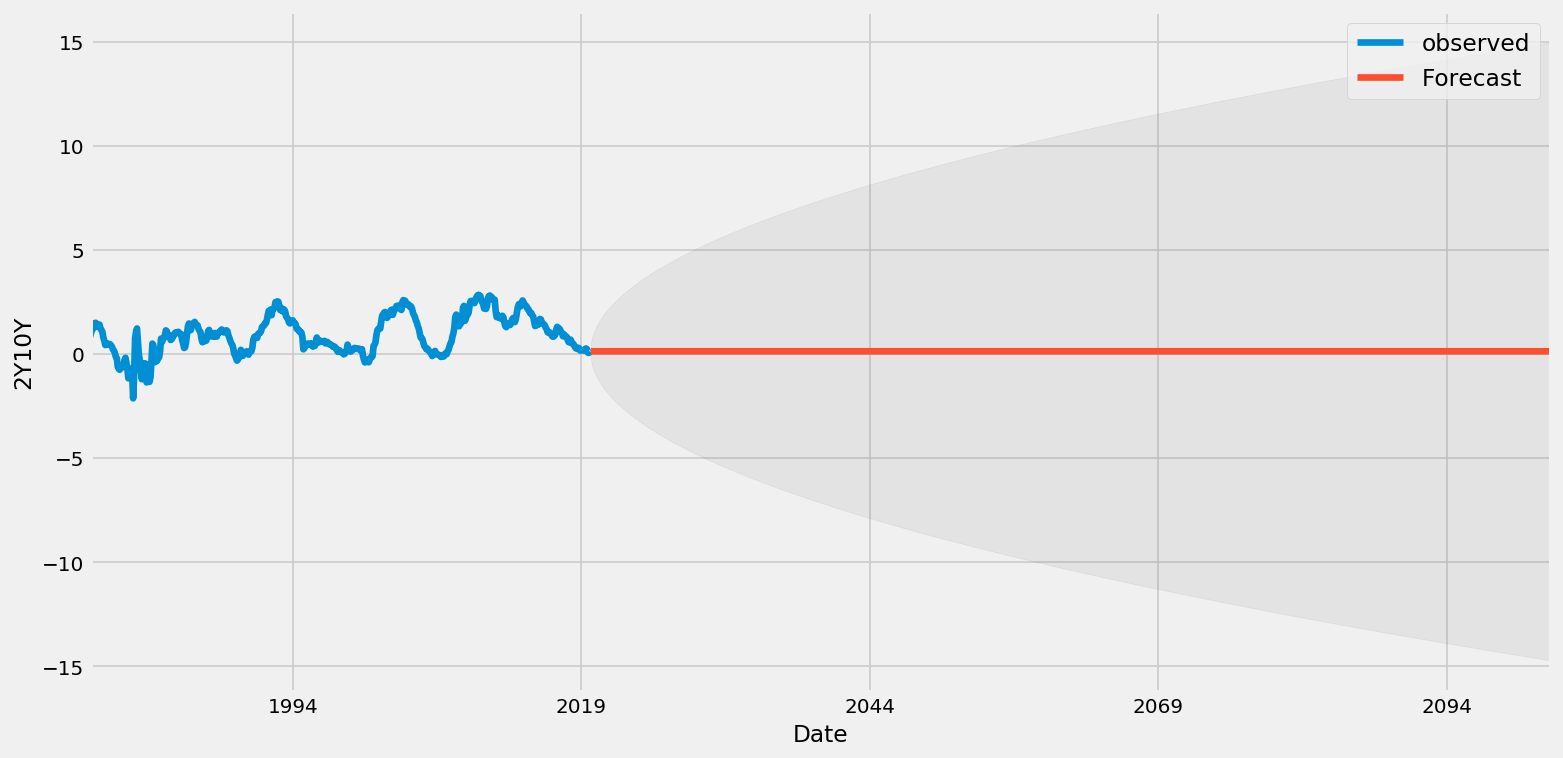

In [40]:
pred_uc = results.get_forecast(steps=1000)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('2Y10Y')
plt.legend()
plt.show()

# 2Y10Y vs Unemployment rate
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

Import unemployment rate and 2Y10Y

In [0]:
from fredapi import Fred
fred = Fred(api_key='04f80a559ab98cb76e6e60c7f421dd51')
datasetT102Y = fred.get_series('T10Y2Y')
datasetUNRATE = fred.get_series('UNRATE')

Insert into dataframes and combine the two

In [42]:

df_filled = df.fillna(method='ffill')

df2Y10Y_initial=pd.DataFrame(data=datasetT102Y, index=None, columns=['value_2Y10Y']) 

#df2Y10Y['dates'] = df2Y10Y.index

df2Y10Y_initial.index.name = 'dates'

df2Y10Y = df2Y10Y_initial.fillna(method='ffill')

dfUNRATE=pd.DataFrame(data=datasetUNRATE, index=None, columns=['value_UNRATE']) 

dfUNRATE.index.name = 'dates'

#dfUNRATE['dates'] = dfUNRATE.index

df2Y10YUNRATE= pd.merge(df2Y10Y, dfUNRATE, on='dates')

df2Y10YUNRATE['dates'] = df2Y10YUNRATE.index

print(df2Y10YUNRATE)

            value_2Y10Y  value_UNRATE      dates
dates                                           
1976-06-01         0.68           7.6 1976-06-01
1976-07-01         0.86           7.8 1976-07-01
1976-09-01         1.14           7.6 1976-09-01
1976-10-01         1.25           7.7 1976-10-01
1976-11-01         1.35           7.8 1976-11-01
1976-12-01         1.57           7.8 1976-12-01
1977-02-01         1.21           7.6 1977-02-01
1977-03-01         1.33           7.4 1977-03-01
1977-04-01         1.41           7.2 1977-04-01
1977-06-01         1.14           7.2 1977-06-01
1977-07-01         1.22           6.9 1977-07-01
1977-08-01         0.94           7.0 1977-08-01
1977-09-01         0.73           6.8 1977-09-01
1977-11-01         0.40           6.8 1977-11-01
1977-12-01         0.45           6.4 1977-12-01
1978-02-01         0.49           6.3 1978-02-01
1978-03-01         0.46           6.3 1978-03-01
1978-05-01         0.33           6.0 1978-05-01
1978-06-01         0

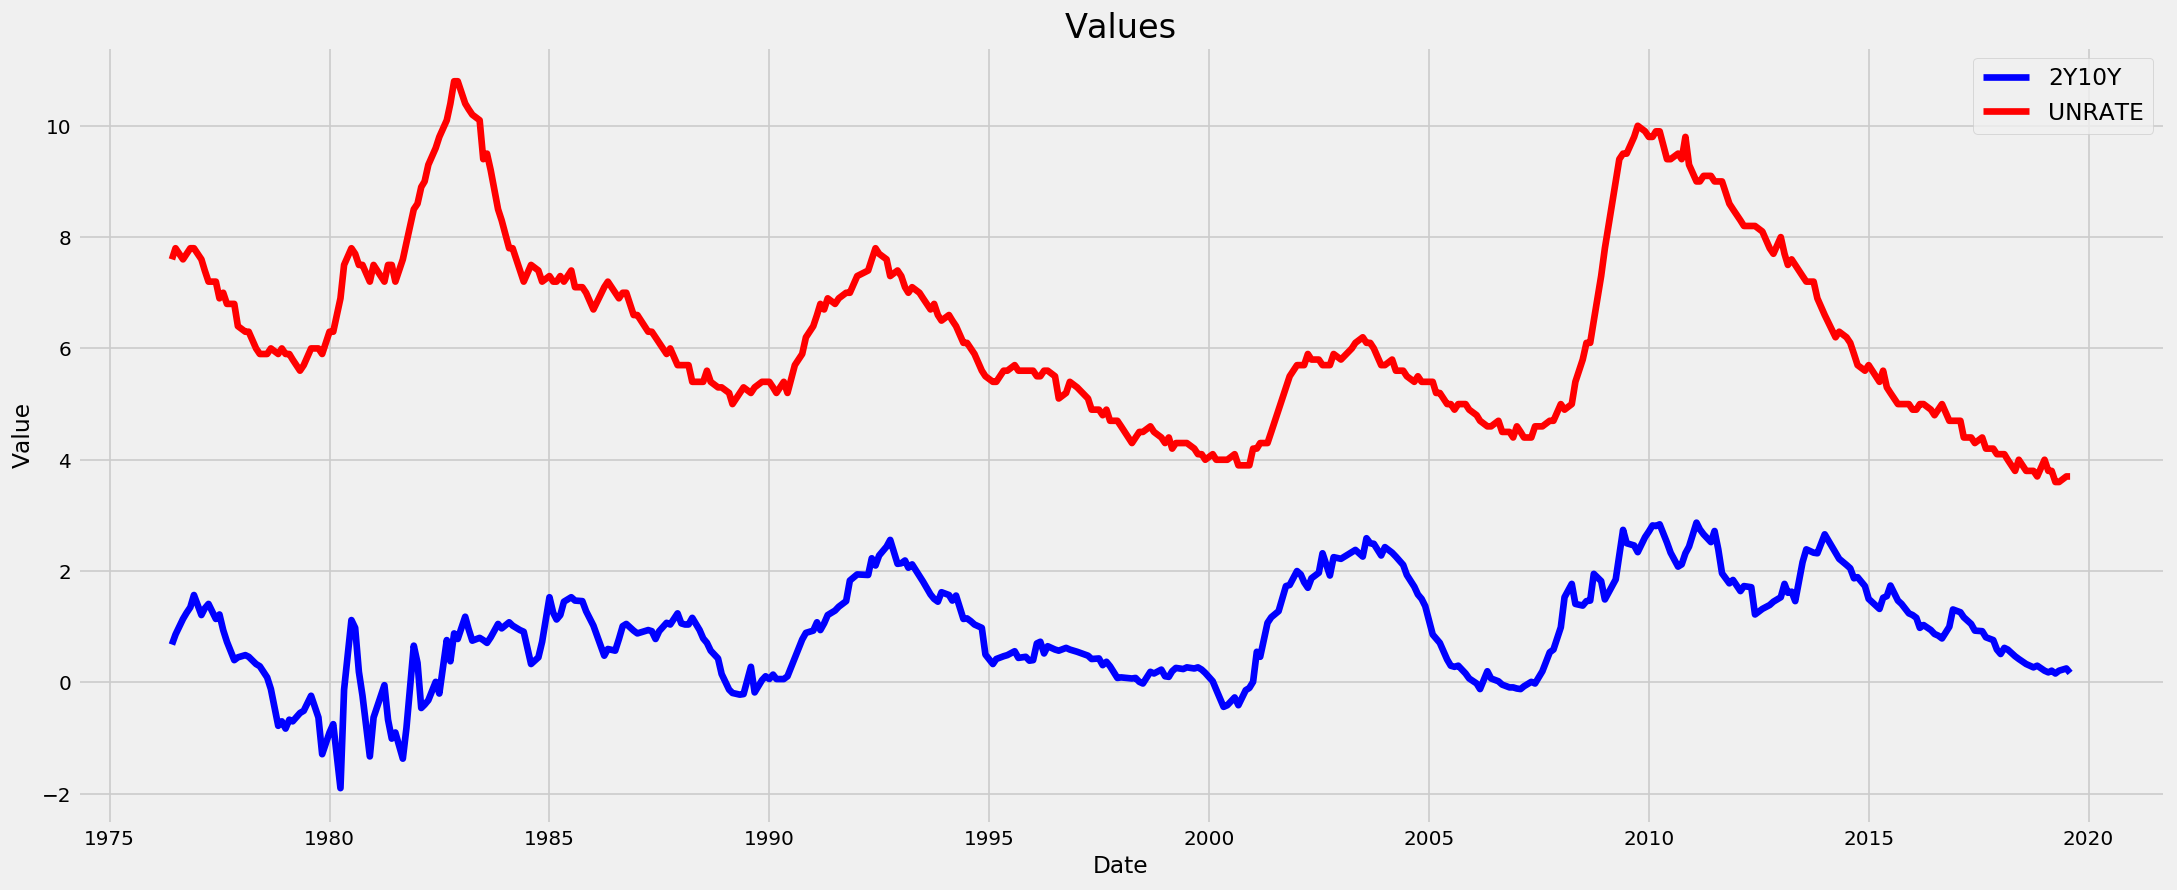

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(df2Y10YUNRATE['dates'], df2Y10YUNRATE['value_2Y10Y'], 'b-', label = '2Y10Y')
plt.plot(df2Y10YUNRATE['dates'], df2Y10YUNRATE['value_UNRATE'], 'r-', label = 'UNRATE')
plt.xlabel('Date'); plt.ylabel('Value'); plt.title('Values')
plt.legend();

In [0]:
#first_date = df2Y10YUNRATE.ix[np.min(list(np.where(df2Y10YUNRATE['value_2Y10Y'] > df2Y10YUNRATE['value_UNRATE'])[0])), 'dates']
#print("When one graph passed the other {}.".format(first_date.date()))

# Facebook Prophet

Making a forecast of 2Y10Y and UNRATE with Facebook Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 2160x720 with 0 Axes>

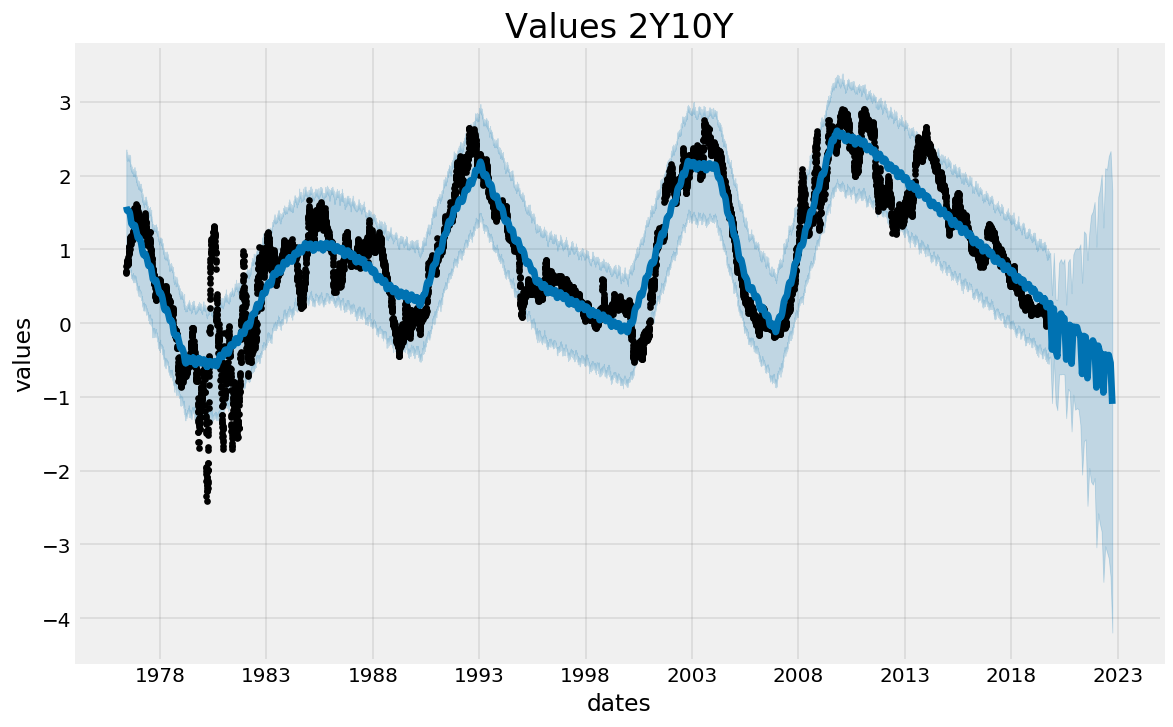

In [45]:
from fbprophet import Prophet

df2Y10Y['dates'] = df2Y10Y.index
df2Y10Y = df2Y10Y.rename(columns={'dates': 'ds', 'value_2Y10Y': 'y'})
df2Y10Y_model = Prophet(interval_width=0.95)
df2Y10Y_model.fit(df2Y10Y)

dfUNRATE['dates'] = dfUNRATE.index
dfUNRATE = dfUNRATE.rename(columns={'dates': 'ds', 'value_UNRATE': 'y'})
dfUNRATE_model = Prophet(interval_width=0.95)
dfUNRATE_model.fit(dfUNRATE)

df2Y10Y_forecast = df2Y10Y_model.make_future_dataframe(periods=36, freq='MS')
df2Y10Y_forecast = df2Y10Y_model.predict(df2Y10Y_forecast)

dfUNRATE_forecast = dfUNRATE_model.make_future_dataframe(periods=36, freq='MS')
dfUNRATE_forecast = dfUNRATE_model.predict(dfUNRATE_forecast)

plt.figure(figsize=(18, 6))
df2Y10Y_model.plot(df2Y10Y_forecast, xlabel = 'dates', ylabel = 'values')
plt.title('Values 2Y10Y');

<Figure size 2160x720 with 0 Axes>

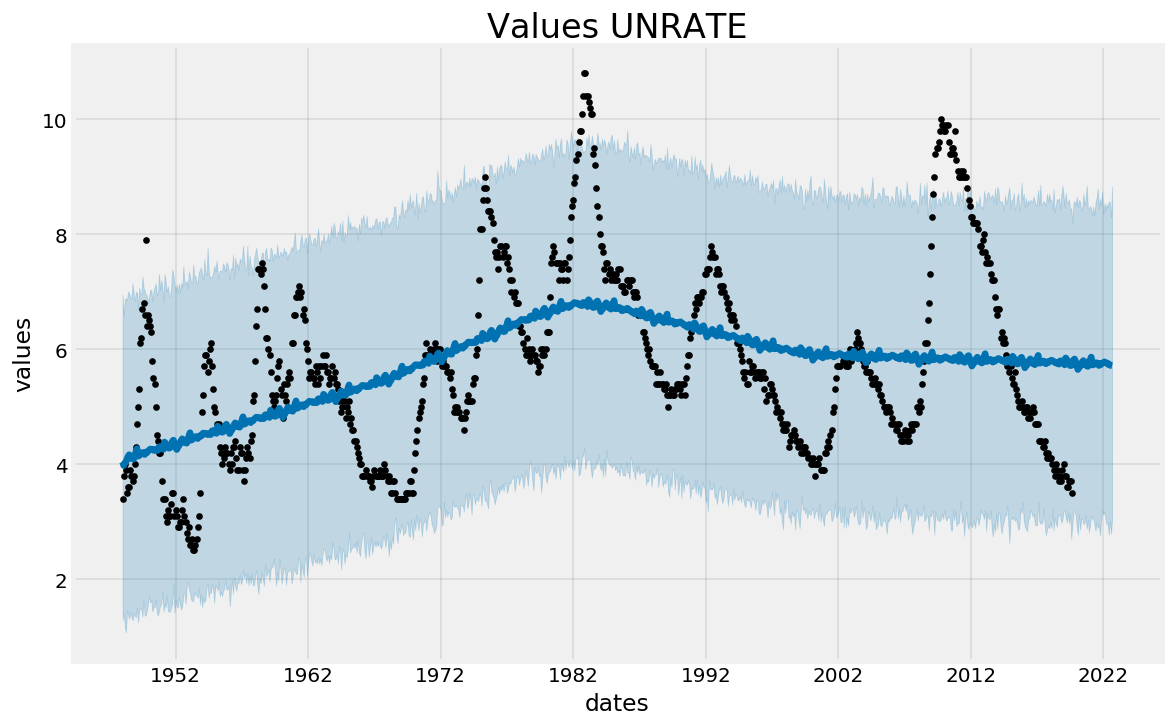

In [46]:
plt.figure(figsize=(18, 6))
dfUNRATE_model.plot(dfUNRATE_forecast, xlabel = 'dates', ylabel = 'values')
plt.title('Values UNRATE');

Calculating trend predictions for 2Y10Y and UNRATE

In [47]:
df2Y10Y_names = ['df2Y10Y_%s' % column for column in df2Y10Y_forecast.columns]
dfUNRATE_names = ['dfUNRATE_%s' % column for column in dfUNRATE_forecast.columns]
merge_df2Y10Y_forecast = df2Y10Y_forecast.copy()
merge_dfUNRATE_forecast = dfUNRATE_forecast.copy()
merge_df2Y10Y_forecast.columns = df2Y10Y_names
merge_dfUNRATE_forecast.columns = dfUNRATE_names
forecast = pd.merge(merge_df2Y10Y_forecast, merge_dfUNRATE_forecast, how = 'inner', left_on = 'df2Y10Y_ds', right_on = 'dfUNRATE_ds')
forecast = forecast.rename(columns={'df2Y10Y_ds': 'dates'}).drop('dfUNRATE_ds', axis=1)
forecast.head(-5)

,dates,df2Y10Y_trend,df2Y10Y_yhat_lower,df2Y10Y_yhat_upper,df2Y10Y_trend_lower,df2Y10Y_trend_upper,df2Y10Y_additive_terms,df2Y10Y_additive_terms_lower,df2Y10Y_additive_terms_upper,df2Y10Y_weekly,df2Y10Y_weekly_lower,df2Y10Y_weekly_upper,df2Y10Y_yearly,df2Y10Y_yearly_lower,df2Y10Y_yearly_upper,df2Y10Y_multiplicative_terms,df2Y10Y_multiplicative_terms_lower,df2Y10Y_multiplicative_terms_upper,df2Y10Y_yhat,dfUNRATE_trend,dfUNRATE_yhat_lower,dfUNRATE_yhat_upper,dfUNRATE_trend_lower,dfUNRATE_trend_upper,dfUNRATE_additive_terms,dfUNRATE_additive_terms_lower,dfUNRATE_additive_terms_upper,dfUNRATE_yearly,dfUNRATE_yearly_lower,dfUNRATE_yearly_upper,dfUNRATE_multiplicative_terms,dfUNRATE_multiplicative_terms_lower,dfUNRATE_multiplicative_terms_upper,dfUNRATE_yhat
0,1976-06-01,1.421784,0.826825,2.276449,1.421784,1.421784,0.158007,0.158007,0.158007,0.160552,0.160552,0.160552,-0.002545,-0.002545,-0.002545,0.0,0.0,0.0,1.579791,6.275226,3.479570,9.143746,6.275226,6.275226,0.066459,0.066459,0.066459,0.066459,0.066459,0.066459,0.0,0.0,0.0,6.341685
1,1976-07-01,1.360558,0.828746,2.227846,1.360558,1.360558,0.166457,0.166457,0.166457,0.162269,0.162269,0.162269,0.004188,0.004188,0.004188,0.0,0.0,0.0,1.527015,6.283347,3.617079,9.207037,6.283347,6.283347,0.089124,0.089124,0.089124,0.089124,0.089124,0.089124,0.0,0.0,0.0,6.372471
2,1976-09-01,1.234023,0.654791,2.073755,1.234023,1.234023,0.110100,0.110100,0.110100,0.162067,0.162067,0.162067,-0.051968,-0.051968,-0.051968,0.0,0.0,0.0,1.344123,6.300129,3.660287,8.974149,6.300129,6.300129,0.010901,0.010901,0.010901,0.010901,0.010901,0.010901,0.0,0.0,0.0,6.311030
3,1976-10-01,1.172797,0.608448,2.086597,1.172797,1.172797,0.140411,0.140411,0.140411,0.161987,0.161987,0.161987,-0.021575,-0.021575,-0.021575,0.0,0.0,0.0,1.313208,6.308250,3.526072,9.098080,6.308250,6.308250,0.025446,0.025446,0.025446,0.025446,0.025446,0.025446,0.0,0.0,0.0,6.333696
4,1976-11-01,1.109529,0.628062,2.067712,1.109529,1.109529,0.202108,0.202108,0.202108,0.161133,0.161133,0.161133,0.040975,0.040975,0.040975,0.0,0.0,0.0,1.311637,6.316641,3.664825,9.272806,6.316641,6.316641,-0.008958,-0.008958,-0.008958,-0.008958,-0.008958,-0.008958,0.0,0.0,0.0,6.307683
5,1976-12-01,1.048303,0.465635,1.895709,1.048303,1.048303,0.161047,0.161047,0.161047,0.162067,0.162067,0.162067,-0.001020,-0.001020,-0.001020,0.0,0.0,0.0,1.209350,6.324762,3.682775,9.133838,6.324762,6.324762,0.046141,0.046141,0.046141,0.046141,0.046141,0.046141,0.0,0.0,0.0,6.370903
6,1977-02-01,0.921768,0.401482,1.856507,0.921768,0.921768,0.195374,0.195374,0.195374,0.160552,0.160552,0.160552,0.034822,0.034822,0.034822,0.0,0.0,0.0,1.117142,6.341544,3.569514,9.385124,6.341544,6.341544,0.154850,0.154850,0.154850,0.154850,0.154850,0.154850,0.0,0.0,0.0,6.496394
7,1977-03-01,0.864623,0.330613,1.687698,0.864623,0.864623,0.128957,0.128957,0.128957,0.160552,0.160552,0.160552,-0.031595,-0.031595,-0.031595,0.0,0.0,0.0,0.993580,6.349124,3.676033,9.026658,6.349124,6.349124,0.019251,0.019251,0.019251,0.019251,0.019251,0.019251,0.0,0.0,0.0,6.368374
8,1977-04-01,0.801356,0.181003,1.653659,0.801356,0.801356,0.121364,0.121364,0.121364,0.161987,0.161987,0.161987,-0.040623,-0.040623,-0.040623,0.0,0.0,0.0,0.922720,6.357515,3.659860,9.211622,6.357515,6.357515,0.022409,0.022409,0.022409,0.022409,0.022409,0.022409,0.0,0.0,0.0,6.379924
9,1977-06-01,0.676862,0.155962,1.543675,0.676862,0.676862,0.160074,0.160074,0.160074,0.162067,0.162067,0.162067,-0.001994,-0.001994,-0.001994,0.0,0.0,0.0,0.836936,6.374027,3.752772,9.079968,6.374027,6.374027,0.057207,0.057207,0.057207,0.057207,0.057207,0.057207,0.0,0.0,0.0,6.431234


Trend comparison of 2Y10Y vs UNRATE

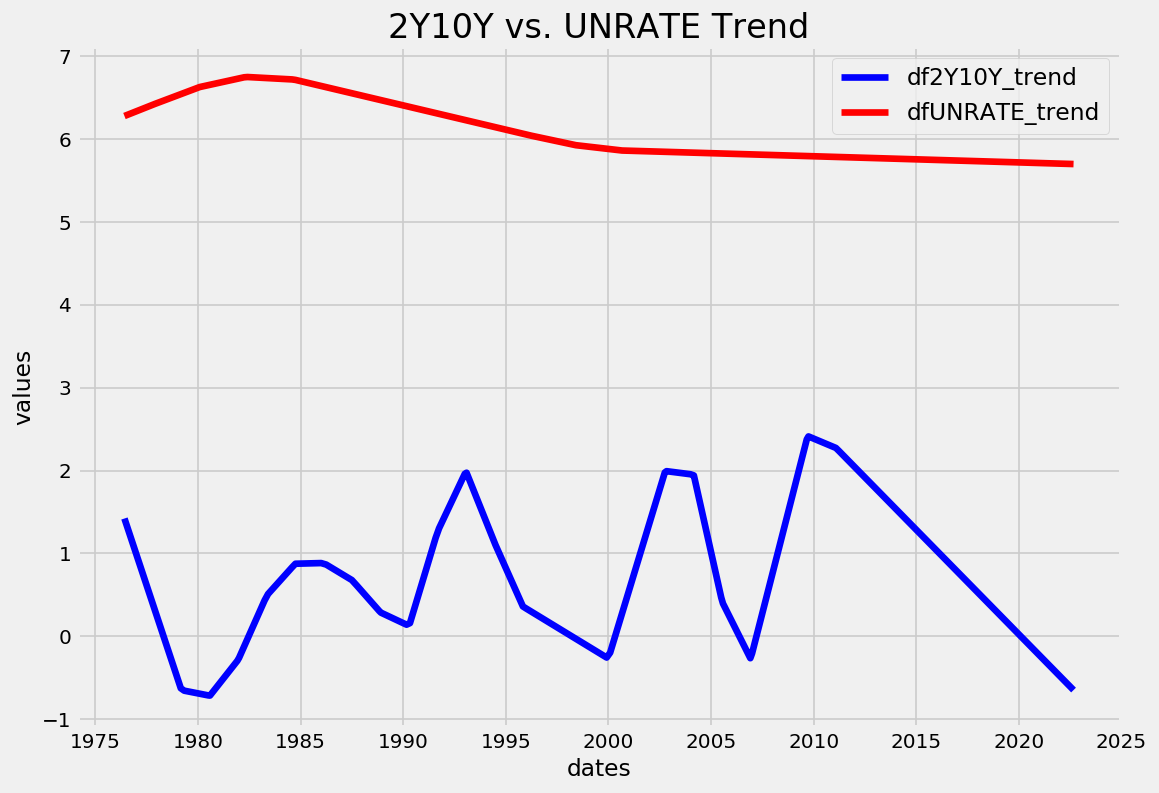

In [48]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['dates'], forecast['df2Y10Y_trend'], 'b-')
plt.plot(forecast['dates'], forecast['dfUNRATE_trend'], 'r-')
plt.legend(); plt.xlabel('dates'); plt.ylabel('values')
plt.title('2Y10Y vs. UNRATE Trend');

Comparison of 2Y10Y vs UNRATE estimates

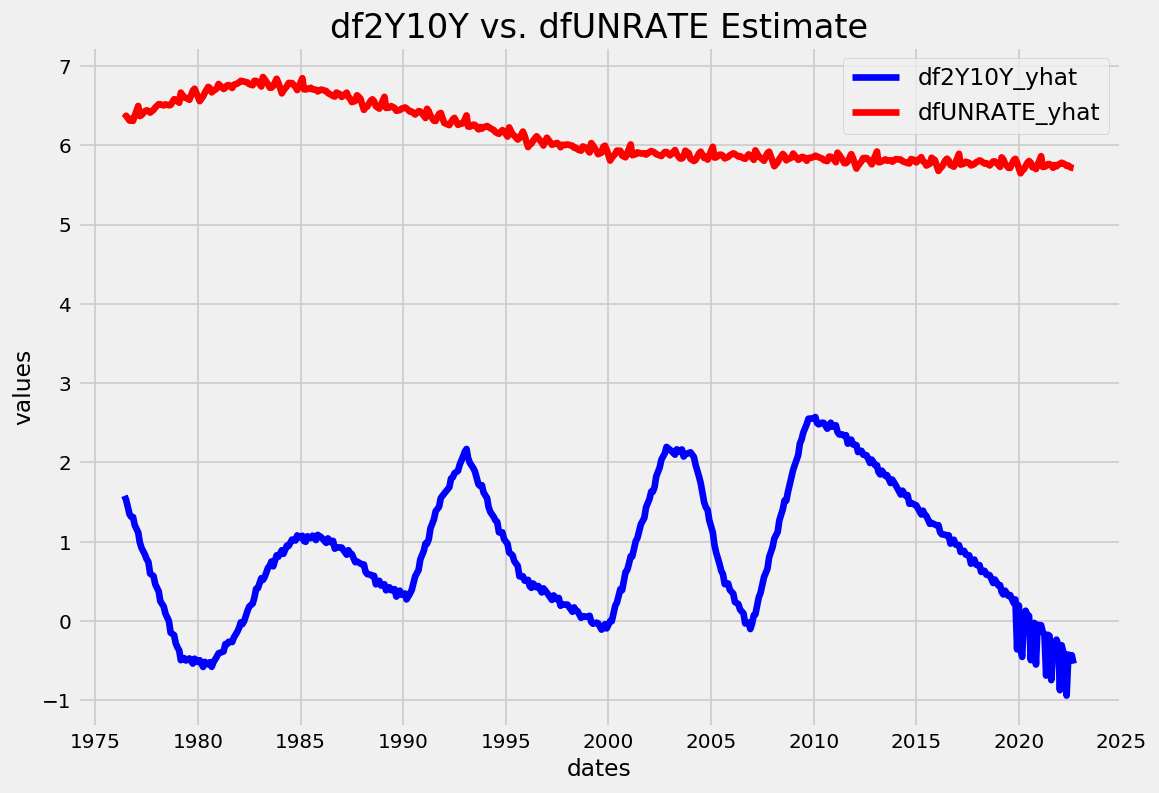

In [49]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['dates'], forecast['df2Y10Y_yhat'], 'b-')
plt.plot(forecast['dates'], forecast['dfUNRATE_yhat'], 'r-')
plt.legend(); plt.xlabel('dates'); plt.ylabel('values')
plt.title('df2Y10Y vs. dfUNRATE Estimate');

Facebook prophet forecasting and analysis

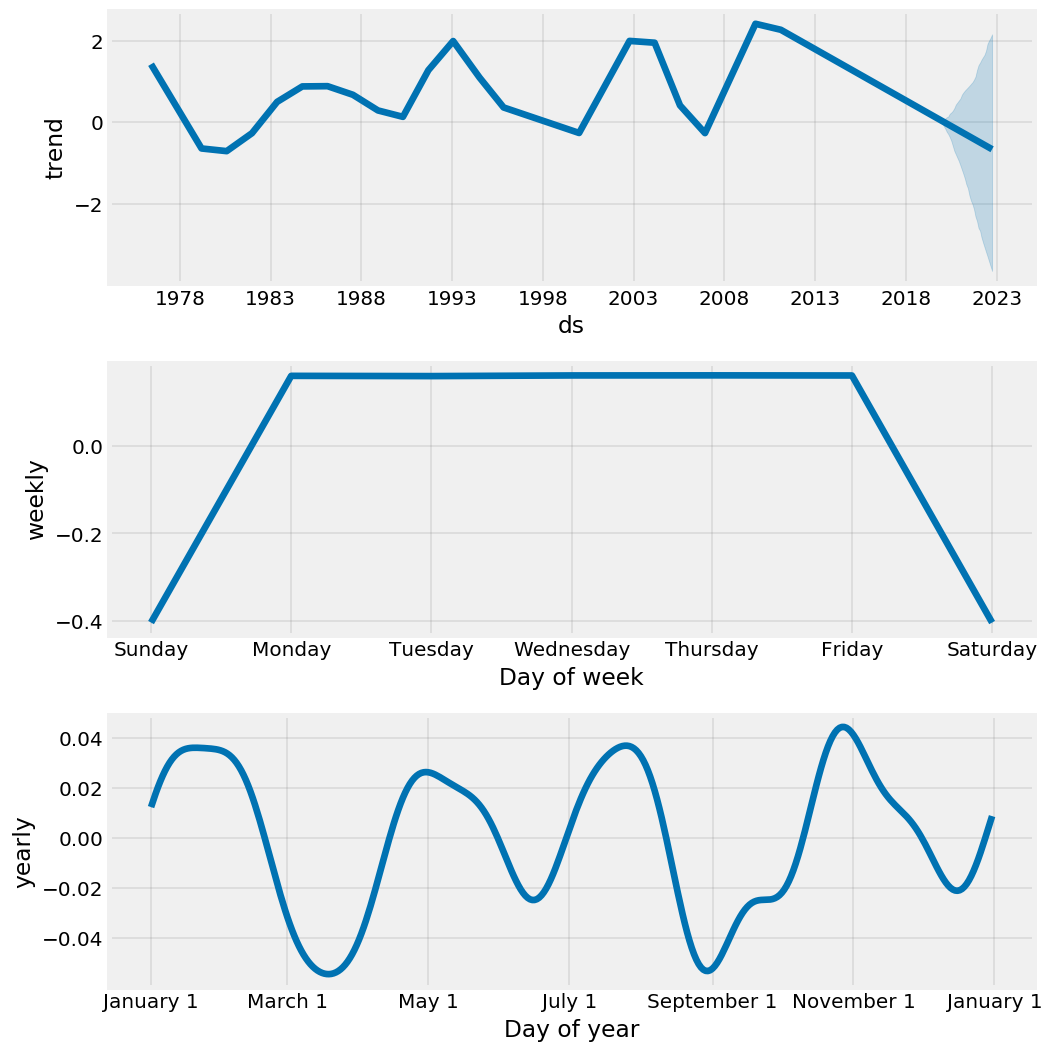

In [50]:
df2Y10Y_model.plot_components(df2Y10Y_forecast);

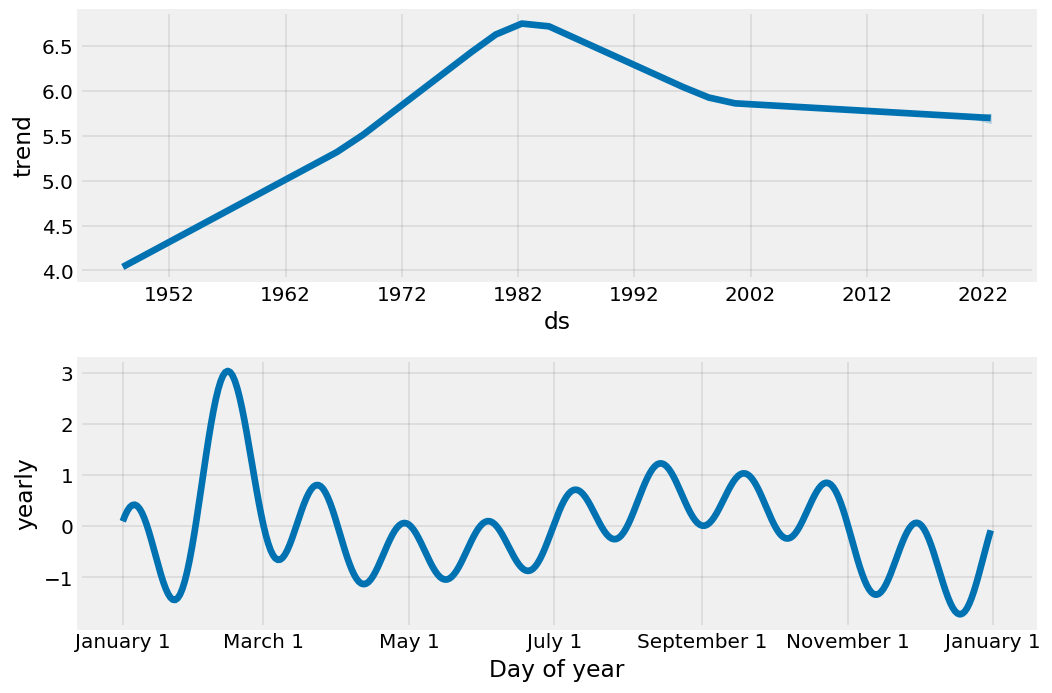

In [51]:
dfUNRATE_model.plot_components(dfUNRATE_forecast);

# Tensorflow

https://mapr.com/blog/deep-learning-tensorflow/

In [52]:
import tensorflow as tf
import os
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
from datetime import datetime
import numpy as np

def to_datetime(date):
    """
    Converts a numpy datetime64 object to a python datetime object 
    Input:
      date - a np.datetime64 object
    Output:
      DATE - a python datetime object
    """
    timestamp = ((date - np.timestamp('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)

Break up of data into batches which can be broken up for training the RNN model

Convert timestamp to float and create array

In [54]:
from datetime import datetime

datasetT102Y = fred.get_series('T10Y2Y')

dfTF=pd.DataFrame(data=datasetT102Y, index=None, columns=['value']) 

#add name to index
dfTF.index.name = 'dates'

#create new column called ds based on index
dfTF['ds'] = dfTF.index

#converts timestamp dates to datetime dates column
#dfTF['dates'] = pd.to_datetime(dfTF['dates']).apply(lambda x: x.date())

dfTF['ds'] = pd.to_numeric(dfTF['ds'])

TS = np.array(dfTF)

print(TS)

#convert dates to string
#dfTF['dates'] = dfTF.ds.dt.strftime('%Y-%m-%d')

#convert dates to float
#dfTF['dates'] = dfTF['dates'].astype(float)

#converts timestamp to datetime
#df2Y10Ynew['dates'] = pd.to_datetime(df2Y10Y['ds']).apply(lambda x: x.date())

#test = df2Y10Y.to_records()

#print(df2Y10Y.dtype)

#Convert date to string
#df2Y10Ynew['dates'] = df2Y10Ynew.ds.dt.strftime('%Y-%m-%d')

#drop columns
#df2Y10Ynew = df2Y10Ynew.drop(columns=['ds'])

#change data type
#df2Y10Ynew['dates'] = df2Y10Ynew['dates'].astype(float)

# debugger module
#import pdb; pdb.set_trace()

#print a certain part of array
#print(TS[:,0])

[[6.8000000e-01 2.0243520e+17]
 [7.1000000e-01 2.0252160e+17]
 [7.0000000e-01 2.0260800e+17]
 ...
 [1.0000000e-01 1.5704064e+18]
 [1.2000000e-01 1.5704928e+18]
 [1.2000000e-01 1.5705792e+18]]


In [55]:
num_periods = 20
f_horizon = 1

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1,20,1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods)) +f_horizon]
y_batches = y_data.reshape(-1,20,1)

print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches.shape)
print(y_batches[0:1])

1130
(1130, 20, 1)
[[[6.800000e-01]
  [2.024352e+17]
  [7.100000e-01]
  [2.025216e+17]
  [7.000000e-01]
  [2.026080e+17]
  [7.700000e-01]
  [2.026944e+17]
  [7.900000e-01]
  [2.029536e+17]
  [7.900000e-01]
  [2.030400e+17]
  [8.200000e-01]
  [2.031264e+17]
  [8.600000e-01]
  [2.032128e+17]
  [8.300000e-01]
  [2.032992e+17]
  [8.300000e-01]
  [2.035584e+17]]

 [[8.300000e-01]
  [2.036448e+17]
  [8.100000e-01]
  [2.037312e+17]
  [7.900000e-01]
  [2.038176e+17]
  [8.200000e-01]
  [2.039040e+17]
  [8.500000e-01]
  [2.041632e+17]
  [8.000000e-01]
  [2.042496e+17]
  [8.000000e-01]
  [2.043360e+17]
  [8.200000e-01]
  [2.044224e+17]
  [8.100000e-01]
  [2.045088e+17]
  [8.400000e-01]
  [2.047680e+17]]]
(1130, 20, 1)
[[[7.100000e-01]
  [2.025216e+17]
  [7.000000e-01]
  [2.026080e+17]
  [7.700000e-01]
  [2.026944e+17]
  [7.900000e-01]
  [2.029536e+17]
  [7.900000e-01]
  [2.030400e+17]
  [8.200000e-01]
  [2.031264e+17]
  [8.600000e-01]
  [2.032128e+17]
  [8.300000e-01]
  [2.032992e+17]
  [8.300000

Pull test data

In [56]:
def test_data (series, forecast, num_periods):
  test_x_setup = TS[-(num_periods + forecast):]
  testX = test_x_setup[:num_periods].reshape(-1,20,1)
  testY = TS[-(num_periods):].reshape(-1,20,1)
  return testX,testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print(X_test.shape)
print(X_test)  

(2, 20, 1)
[[[7.0000000e-02]
  [1.5681600e+18]
  [7.0000000e-02]
  [1.5682464e+18]
  [1.1000000e-01]
  [1.5683328e+18]
  [1.0000000e-01]
  [1.5685920e+18]
  [9.0000000e-02]
  [1.5686784e+18]
  [3.0000000e-02]
  [1.5687648e+18]
  [5.0000000e-02]
  [1.5688512e+18]
  [5.0000000e-02]
  [1.5689376e+18]
  [4.0000000e-02]
  [1.5691968e+18]
  [4.0000000e-02]
  [1.5692832e+18]]

 [[5.0000000e-02]
  [1.5693696e+18]
  [4.0000000e-02]
  [1.5694560e+18]
  [6.0000000e-02]
  [1.5695424e+18]
  [5.0000000e-02]
  [1.5698016e+18]
  [9.0000000e-02]
  [1.5698880e+18]
  [1.2000000e-01]
  [1.5699744e+18]
  [1.5000000e-01]
  [1.5700608e+18]
  [1.2000000e-01]
  [1.5701472e+18]
  [1.0000000e-01]
  [1.5704064e+18]
  [1.2000000e-01]
  [1.5704928e+18]]]


Setup of Tensorflow model

Relu is used but sigmoid could be used as well

MSE is used to measure predictive performance

In [57]:
tf.reset_default_graph()

num_periods = 20
inputs = 1
hidden = 100
output = 1

x = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, x, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1,hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Implement model

MSE returns nan for some reason

In [58]:
epochs = 1000

with tf.Session() as sess:
  init.run()
  for ep in range(epochs):
    sess.run(training_op, feed_dict={x: x_batches, y: y_batches})
    if ep % 100 == 0:
      mse = loss.eval(feed_dict={x: x_batches, y: y_batches})
      print(ep, "\tMSE:", mse)

  y_pred = sess.run(outputs, feed_dict={x: X_test})
  print(y_pred)

0 	MSE: nan
100 	MSE: nan
200 	MSE: nan
300 	MSE: nan
400 	MSE: nan
500 	MSE: nan
600 	MSE: nan
700 	MSE: nan
800 	MSE: nan
900 	MSE: nan
[[[nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]
  [nan]]]
